# Compare positions obtain from optitrack & predicted from model

In [1]:
from nn import KinematicMLP, InverseKinematicMLP
import torch

import joblib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


### Load Model

In [2]:
# Load model
model = InverseKinematicMLP(input_size=9, output_size=9)
model.load_state_dict(torch.load("inverse_kinematic_model_MASS_8999.pth"))
model.eval()

# Load actuation sample from saved dataset
scaler_X = joblib.load("scaler_X_ik_MASS_8999.save")
scaler_Y = joblib.load("scaler_Y_ik_MASS_8999.save")

### Load the position of **all positions** (x,y,z)*3 --> 9 values

In [16]:
df = pd.read_csv("optitrack_mass_data_full_bodies_data30_actrange300_date2105_night_3.csv")
# df = pd.read_csv("optitrack_data_full_bodies_data30_actrange400_date1104_2.csv")
# df = pd.read_csv("optitrack_data_full_bodies_data30_actrange400_date1104_3.csv")

# Extract all position data - 
# SA-up-x, SA-up-y, SA-up-z, SA-middle-x, SA-middle-y, SA-middle-z, SA-low-x, SA-low-y, SA-low-z

df = df[["SA-low-X", "SA-low-Y", "SA-low-Z", "SA-middle-X", "SA-middle-Y", "SA-middle-Z", "SA-up-X", "SA-up-Y", "SA-up-Z"]]
print(df.head())
# Convert to numpy array
data = df.to_numpy()

   SA-low-X  SA-low-Y  SA-low-Z  SA-middle-X  SA-middle-Y  SA-middle-Z  \
0 -0.344598  0.359098 -0.015333    -0.343661     0.568979    -0.010708   
1 -0.355019  0.357755 -0.009588    -0.373648     0.564890     0.016277   
2 -0.363340  0.356319 -0.005934    -0.400507     0.558389     0.033088   
3 -0.355413  0.358094 -0.015217    -0.379610     0.565963    -0.001948   
4 -0.371209  0.355517 -0.017042    -0.436334     0.553362     0.000648   

    SA-up-X   SA-up-Y   SA-up-Z  
0 -0.344857  0.778395 -0.018039  
1 -0.400987  0.771656  0.042935  
2 -0.455433  0.754951  0.082297  
3 -0.419267  0.772090  0.008980  
4 -0.535836  0.736840  0.019887  


### Prediction

In [17]:
# Normalize the data using the scaler
X_norm = scaler_X.transform(data)
# Convert to torch tensor
X_tensor = torch.tensor(X_norm , dtype=torch.float32)

# Predict the delta L values using the model
Y_pred = model(X_tensor).detach().numpy()
# Inverse transform the predicted output using the scaler
Y_pred_inv = scaler_Y.inverse_transform(Y_pred)

# Reshape the predicted output to match the original shape 
Y_pred_inv = Y_pred_inv.reshape(-1, 3, 3)

print(Y_pred_inv.shape)

(30, 3, 3)


In [18]:
Y_pred_inv.astype(int)

array([[[ -113,   100,   110],
        [  405,  -583,   156],
        [ -420,   150,   329]],

       [[   75,   -44,    55],
        [  566,  -553,   -50],
        [  -96,   -39,   194]],

       [[  247,  -185,    15],
        [  645,  -586,   -99],
        [   57,  -161,   166]],

       [[   20,   -77,   152],
        [  536,  -685,   125],
        [ -108,  -100,   272]],

       [[  200,  -371,   264],
        [  636,  -894,   240],
        [   30,  -390,   432]],

       [[  299,  -148,   -75],
        [  723,  -681,   -80],
        [  167,  -147,    46]],

       [[  288,  -143,   -69],
        [  724,  -682,   -80],
        [  171,  -144,    40]],

       [[   28,   241,  -202],
        [  472,  -261,  -276],
        [  -69,   244,  -126]],

       [[  181,   306,  -441],
        [  556,  -102,  -549],
        [  104,   377,  -437]],

       [[  282,   369,  -596],
        [  587,     1,  -673],
        [  239,   322,  -511]],

       [[  350,   499,  -767],
        [  514,   2

In [19]:
# Sum across the last axis (i.e., each triplet)
sums = Y_pred_inv.sum(axis=2)

print(sums.shape)
print(sums)

(30, 3)
[[ 97.65161  -21.684372  60.35544 ]
 [ 86.39125  -37.18351   57.907745]
 [ 77.8781   -40.330254  62.827454]
 [ 96.20906  -23.211014  63.783813]
 [ 92.826065 -17.370895  72.62402 ]
 [ 75.29567  -39.317017  66.54531 ]
 [ 75.488495 -38.789864  66.691986]
 [ 66.586655 -66.09717   48.336693]
 [ 47.08905  -94.54443   43.66095 ]
 [ 54.599426 -84.81      50.601562]
 [ 81.943054 -40.194702  87.83453 ]
 [ 81.454285 -31.09967   91.33832 ]
 [ 77.44409  -37.99243   85.81464 ]
 [ 67.59723  -51.062134  74.60724 ]
 [ 62.037262 -58.067444  73.98706 ]
 [ 67.39752  -55.461304  70.64014 ]
 [ 68.40442  -49.135864  78.85791 ]
 [ 51.58673  -75.56348   68.222046]
 [ 73.34073  -41.957367  99.87634 ]
 [ 64.49863  -54.565857  84.57019 ]
 [ 52.660034 -57.87372   75.068726]
 [ 51.390686 -59.397644  74.65631 ]
 [ 44.412537 -62.87024   50.532043]
 [ 51.76306  -51.658875  57.610657]
 [ 43.640503 -57.753845  40.036865]
 [ 42.41382  -53.70813   36.51532 ]
 [ 48.031677 -50.482178  44.848145]
 [ 47.620605 -57.539

### Load the actuation data, which is the ground truth data

In [20]:
gt = np.load("data_optitrack/data_MASS30_actrange300_date2105_night_3.npz")
# gt = np.load("data_optitrack/data30_actrange400_date1104_2.npz")
# gt = np.load("data_optitrack/data30_actrange400_date1104_3.npz")

# actual_position_list, act_list, wanted_position_list
actual_position_list = gt["actual_position_list"]
act_list = gt["act_list"]
wanted_position_list = gt["wanted_position_list"]

# Check shape
print(f"actual_position_list shape: {actual_position_list.shape}")
print(f"act_list shape: {act_list.shape}")
print(f"wanted_position_list shape: {wanted_position_list.shape}")

actual_position_list shape: (30, 3, 3)
act_list shape: (30, 3, 3)
wanted_position_list shape: (30, 3, 3)


In [21]:
actual_position_list[0:3]

array([[[14402., 14027.,     0.],
        [10275., 13945., 20418.],
        [13754., 13948., 14228.]],

       [[14402., 14026., 10418.],
        [10275., 13945., 20418.],
        [13754., 13948., 14228.]],

       [[14707., 13876., 10370.],
        [10508., 13762., 20330.],
        [13975., 13779., 14141.]]])

In [22]:
# delete the first element of the actual_position_list
actual_position_list = np.delete(gt["actual_position_list"], 0, axis=0)
safe_position = actual_position_list[0]

print(f"safe_position: {safe_position}")
# Subtract all actual_position_list by the first element to get the relative position -> delta L
actual_position_list = actual_position_list - safe_position
actual_position_list[0:5]
print(f"actual_position_list shape: {actual_position_list.shape}")

safe_position: [[14402. 14026. 10418.]
 [10275. 13945. 20418.]
 [13754. 13948. 14228.]]
actual_position_list shape: (29, 3, 3)


In [23]:
print(actual_position_list[0:5])

[[[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[ 305. -150.  -48.]
  [ 233. -183.  -88.]
  [ 221. -169.  -87.]]

 [[ 494. -310.  -74.]
  [ 401. -342. -113.]
  [ 405. -328. -109.]]

 [[ 178. -202.   74.]
  [ 141. -241.   22.]
  [ 138. -219.    7.]]

 [[ 404. -540.  202.]
  [ 314. -568.  199.]
  [ 327. -552.  147.]]]


### Compare 

In [24]:
# dropt the first element of the predicted output
# create a copy
Y_pred_inv_ = Y_pred_inv.copy()
# delete the last element of the Y_pred_inv
# Y_pred_inv_ = np.delete(Y_pred_inv_, -1, axis=0)

# delete the first element of the Y_pred_inv
Y_pred_inv_ = np.delete(Y_pred_inv_, 0, axis=0)

# # delete the last element of the Y_pred_inv
# Y_pred_inv_ = np.delete(Y_pred_inv_, -1, axis=0)

# Compare the predicted output with the actual output
diff = np.abs(Y_pred_inv_ - actual_position_list)

# Print the difference in int
print("Difference in int:")
print(diff.astype(int))

Difference in int:
[[[ 75  44  55]
  [566 553  50]
  [ 96  39 194]]

 [[ 57  35  63]
  [412 403  11]
  [163   7 253]]

 [[473 232 226]
  [135 343 238]
  [513 227 381]]

 [[ 22 169 190]
  [495 653 218]
  [107 171 425]]

 [[104 391 277]
  [409 113 279]
  [159 404 100]]

 [[277 136 135]
  [212 304 157]
  [305 155 280]]

 [[511 519   2]
  [ 25  95  39]
  [545 531 113]]

 [[ 54  82  66]
  [357 259 142]
  [ 94 211  31]]

 [[161  56  71]
  [181 218  33]
  [128  56 194]]

 [[182  96  92]
  [  6  35  88]
  [211  83 458]]

 [[188 183 368]
  [ 25 258 358]
  [ 38  17 180]]

 [[ 28 475 498]
  [195 543 412]
  [109 252 530]]

 [[ 32 413 469]
  [187 528 355]
  [280   3 415]]

 [[251 305 572]
  [ 60 463 435]
  [376 208 274]]

 [[181 348 181]
  [429 471  69]
  [257  52 486]]

 [[143  38 200]
  [111 211  60]
  [308 224 729]]

 [[255 348 578]
  [245 580 341]
  [350  92 394]]

 [[175 160 355]
  [325 484 208]
  [804 280 740]]

 [[282 459 180]
  [597 583  83]
  [267  58 464]]

 [[467 415  40]
  [505 496  62]

In [25]:
diff_ = (Y_pred_inv_ - actual_position_list)

row_sums = diff_.sum(axis=2)  * 0.01534 
print(row_sums.astype(int))

[[1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 2]
 [0 0 2]
 [0 1 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 2]
 [0 1 1]
 [0 0 2]
 [0 0 2]
 [0 0 1]
 [0 0 2]
 [0 0 3]
 [0 0 2]
 [0 0 3]
 [0 1 2]
 [0 0 1]
 [0 0 2]
 [0 0 1]
 [1 0 1]
 [0 0 1]
 [0 1 0]
 [1 1 1]
 [2 0 2]
 [0 0 1]
 [1 0 1]]


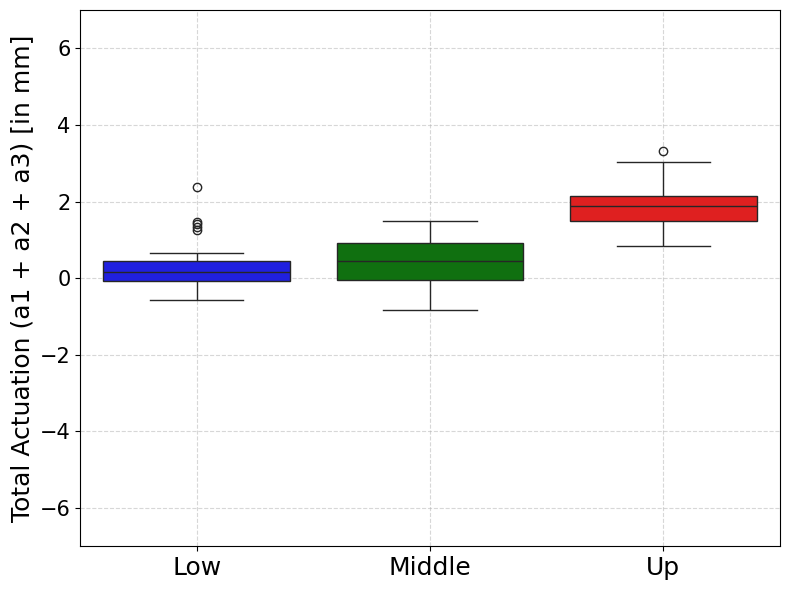

In [26]:
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(8, 6))

sns.boxplot(data=row_sums, orient='v', palette=['blue', 'green', 'red'])
plt.xticks([0, 1, 2], ['Low', 'Middle', 'Up'], fontsize=18)

# increase size of values 
plt.yticks(fontsize=15)
# plt.title('Total Actuation (a1 + a2 + a3) by Section (3 inputs) - absolute difference')
plt.ylabel('Total Actuation (a1 + a2 + a3) [in mm]', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.5)
# Show in rnage of values
plt.ylim(-7, 7)
plt.tight_layout()
plt.show()

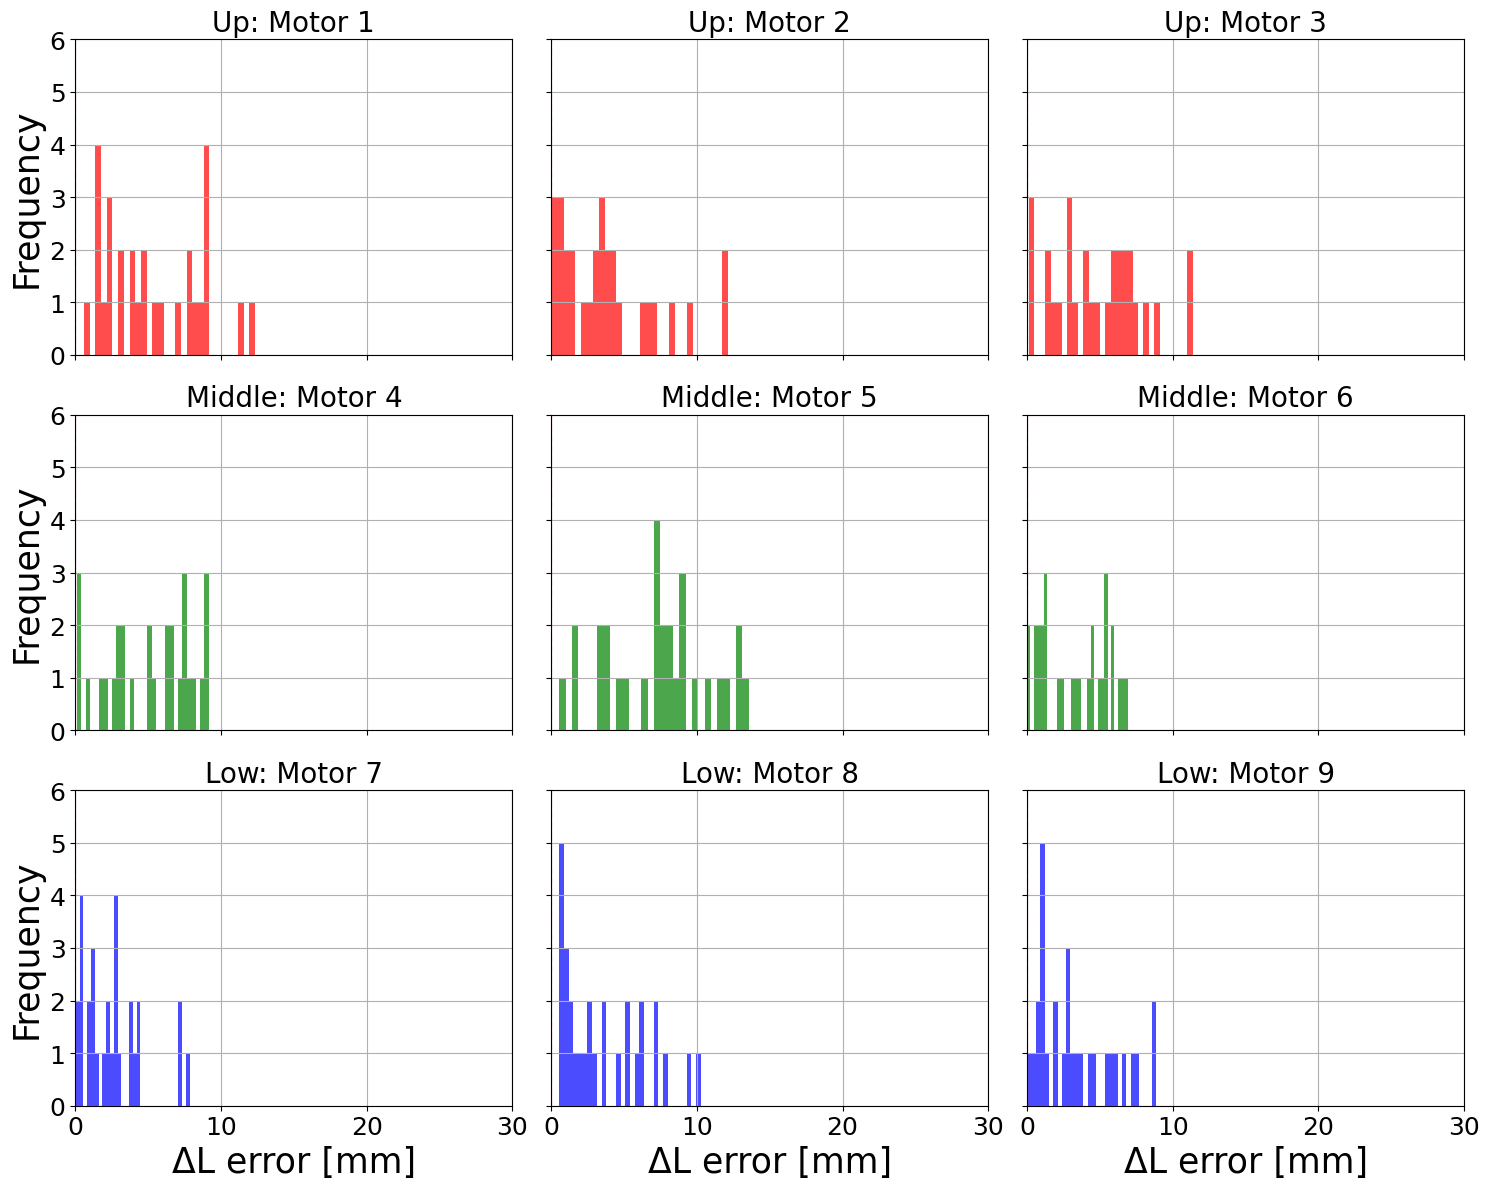

In [27]:
# Convert residuals to delta L values
residuals = diff.reshape(-1, 9)

diff_deltaL = residuals * 0.01534

fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=True, sharey=True)

# Define new order: up → middle → low
group_labels = ['Up', 'Middle', 'Low']
group_colors = ['red', 'green', 'blue']

column_indices = [6, 7, 8, 3, 4, 5, 0, 1, 2]

for plot_idx, col_idx in enumerate(column_indices):
    i = plot_idx // 3  # row
    j = plot_idx % 3   # col
    k = plot_idx + 1   # motor number
    ax = axes[i, j]
    
    ax.set_xlim(0, 30)
    ax.set_ylim(0, 6)
    ax.hist(diff_deltaL[:, col_idx], bins=30, alpha=0.7, color=group_colors[i])
    
    group = group_labels[i]
    ax.set_title(f"{group}: Motor {k}", fontsize=20)
    ax.tick_params(axis='both', labelsize=18)

    
    # X-label only on bottom row
    if i == 2:
        ax.set_xlabel("ΔL error [mm]", fontsize=25)

    # Y-label only on first column
    if j == 0:
        ax.set_ylabel("Frequency", fontsize=25)
    
    ax.axvline(0, color='red', linestyle='--')
    ax.grid(True)

plt.tight_layout()
plt.show()


These numbers correspond to the **difference** of number of ticks. 
As our pulley diameter D = 20 mmm --> circumference C = pi * 20 mm = 62.83 mm/rev

Our dynamixel has a resolution of 12-bit: 4096 ticks/revolution, this means 4096 ticks ==> 62.83 mm
Each tick corresponds to:
62.83/4096 = **0.01534 mm/tick**

So for example, difference of 500 ticks corresponds to:
deltaL = 500 * 0.01534 mm = *7.67 mm*
of movement of cable. 